<a href="https://colab.research.google.com/github/NiEl0503/Simulador6/blob/main/Simulador6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introdução ao Machine Learning - Simulador 6**

#### **Análise Exploratória de Dados**
- Descrição: A EDA é o processo inicial de análise dos dados, onde se busca entender as distribuições das variáveis, suas relações e a presença de outliers ou valores ausentes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_csv('/content/Wine_QT_df19e4d086.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [3]:
# Remover a coluna 'Id' do dataset
wine1 = wine.drop(columns=['Id'])

In [ ]:
# Estatística Descritiva
wine1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


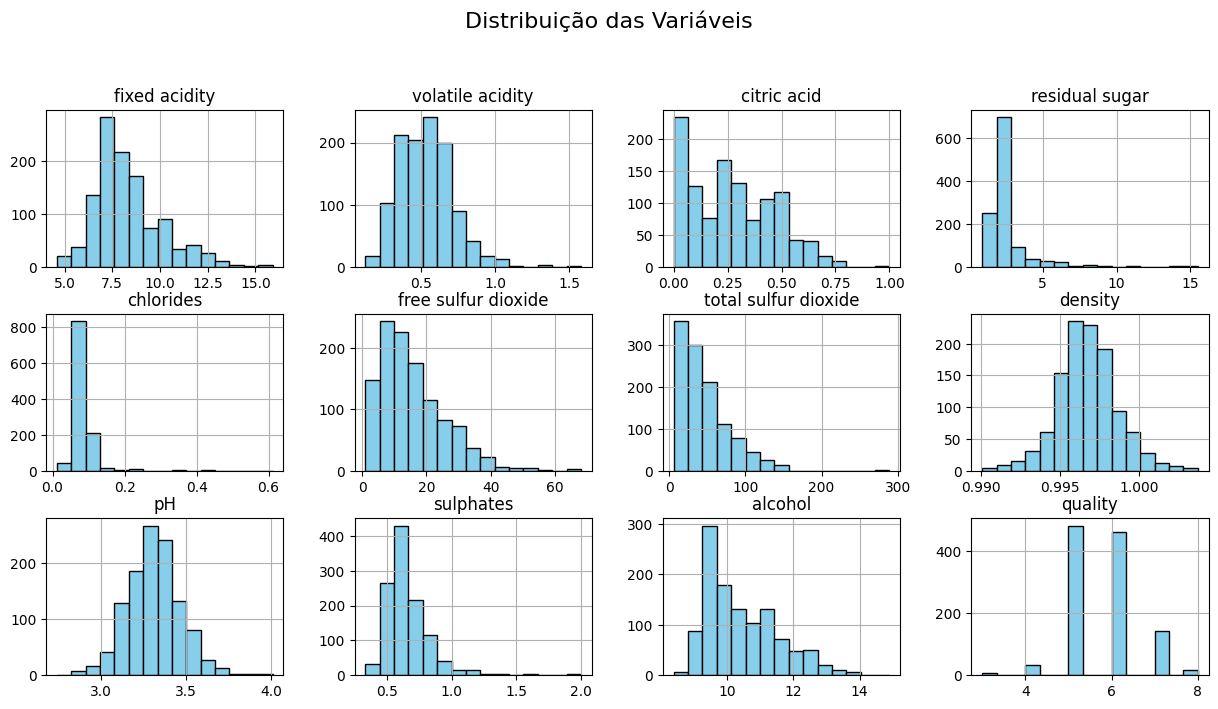

In [ ]:
# Visualizar histogramas das variáveis
wine1.hist(bins=15, figsize=(15, 10), layout=(4, 4), edgecolor='black', color='skyblue')
plt.suptitle("Distribuição das Variáveis", fontsize=16)
plt.show()

In [ ]:
# Matriz de correlação
correlation_matrix = wine1.corr()

# Exibir correlações com a variável 'quality'
quality_correlation = correlation_matrix['quality'].sort_values(ascending=False)
print("Correlação com a qualidade do vinho:")
print(quality_correlation)

Correlação com a qualidade do vinho:
quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


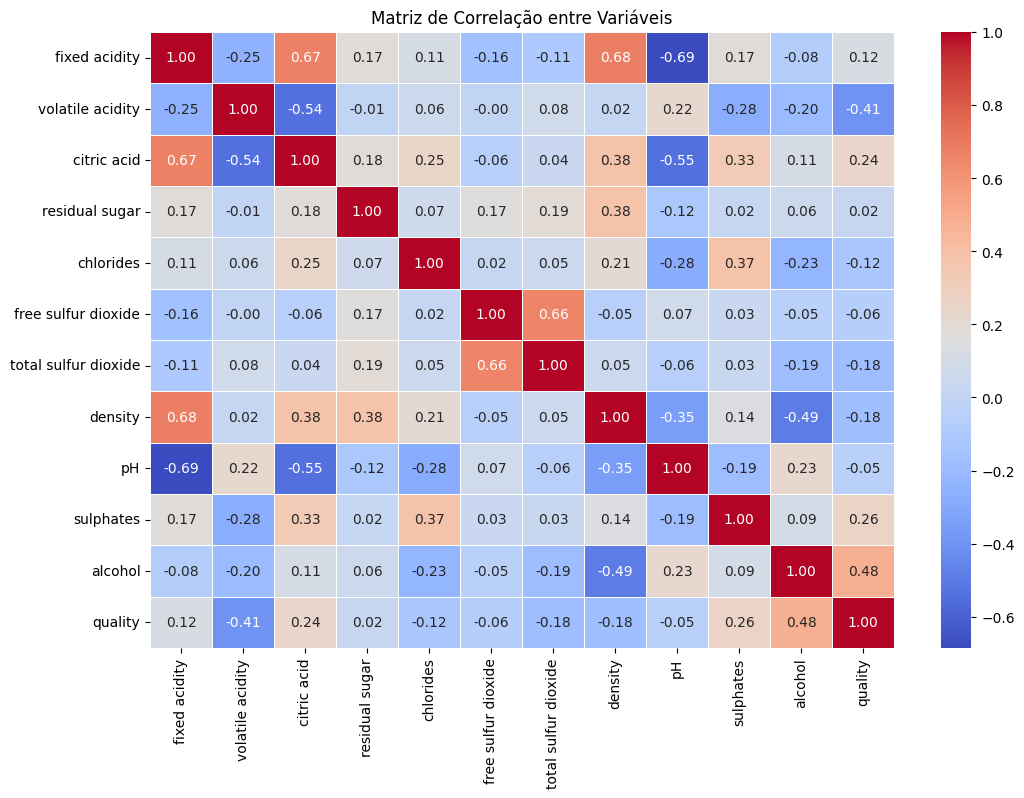

In [ ]:
# Exibir matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

#### **Pré-processamento de Dados**
- Descrição: O pré-processamento inclui a preparação dos dados para serem utilizados pelos algoritmos, como tratamento de valores ausentes,
normalização, ou padronização das variáveis numéricas.


In [ ]:
print("Valores ausentes por coluna:")
print(wine.isnull().sum())

Valores ausentes por coluna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


**Valores Ausentes:** Não há valores ausentes, pois todas as colunas têm 1.143 valores não nulos.

In [ ]:
# Valores Únicos e Contagem de Valores por Classe
value_unique = wine1['quality'].value_counts()
print(value_unique)

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


As classes 5 e 6 são muito mais numerosas que as classes 3, 4, 8 e 7.

#### **Treinamento de Modelo**
- Descrição: O treinamento do modelo envolve aplicar um algoritmo de machine learning aos dados processados para construir um modelo preditivo que possa ser avaliado e ajustado.


In [ ]:
# modelo de Regressão Linear
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

X = wine1.drop(columns=['quality'])
y = wine1['quality']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar um modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

print("Comparação entre previsões e valores reais:")
print("Previsões:", y_pred[:10])
print("Valores reais:", y_test[:10].values)


Comparação entre previsões e valores reais:
Previsões: [5.37639096 4.81275231 5.26822711 5.08826518 6.09668676 6.60433542
 5.36417303 5.06978794 5.78461148 5.32382095]
Valores reais: [5 6 5 6 6 8 5 5 6 5]


#### **Avaliação de Desempenho**
- Descrição: A avaliação de desempenho é essencial para verificar o quão bem o modelo está funcionando. Métricas de regressão como R², RMSE, ou MAE são usadas para quantificar o erro do modelo em prever a qualidade do vinho.

In [ ]:
# Calcular as métricas de desempenho
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("R²:", r2)
print("RMSE:", rmse)
print("MAE:", mae)


R²: 0.3170693672733129
RMSE: 0.6164677203737233
MAE: 0.4773398352588607


**O modelo de Regressão Linear apresentou os seguintes resultados no conjunto de teste:**

R²: 0.317 — indicando que o modelo explica aproximadamente 31.7% da variabilidade da qualidade do vinho.

RMSE (Raiz do Erro Quadrático Médio): 0.616 — valor médio de erro nas previsões.

MAE (Erro Médio Absoluto): 0.477 — valor médio absoluto da diferença entre as previsões e os valores reais.

**Esses valores sugerem que o modelo possui um desempenho básico.**

#### **Trabalhando com outros modelos**

**Árvores de Decisão**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Modelo de Árvore de Decisão
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Previsões e avaliação
y_pred_tree = tree_model.predict(X_test)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print("RMSE:", rmse_tree)
print("R²:", r2_tree)


RMSE: 0.7902241128133308
R²: -0.12216434788568242


RMSE (Raiz do Erro Quadrático Médio): Um valor de 0.79 indica que o modelo tem, em média, um erro de aproximadamente 0.79 unidades em suas previsões.

R² (Coeficiente de Determinação): Árvore de Decisão não está conseguindo explicar a variabilidade da variável quality com os dados disponíveis.

In [ ]:
# Aplicando hiperparâmetros
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Teste com diferentes valores de hiperparâmetros
tree_model = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
tree_model.fit(X_train, y_train)

# Previsões e avaliação
y_pred_tree = tree_model.predict(X_test)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print("Árvore de Decisão com Hiperparâmetros Ajustados - RMSE:", rmse_tree)
print("Árvore de Decisão com Hiperparâmetros Ajustados - R²:", r2_tree)


Árvore de Decisão com Hiperparâmetros Ajustados - RMSE: 0.6456291123809408
Árvore de Decisão com Hiperparâmetros Ajustados - R²: 0.250930486790484


Esses resultados indicam uma melhora significativa no desempenho da Árvore de Decisão em comparação com a configuração anterior:

RMSE de 0.645: O erro médio das previsões foi reduzido para aproximadamente 0.645, o que é uma melhora em relação ao valor anterior (0.79). Quanto menor o RMSE, melhor o modelo está se ajustando aos dados de teste.

R² de 0.251: Agora, o modelo explica cerca de 25% da variabilidade da qualidade do vinho, uma melhora considerável em comparação ao valor negativo anterior. Isso sugere que os ajustes de hiperparâmetros ajudaram o modelo a capturar melhor as relações entre as variáveis.

**Modelo Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Modelo Random Forest
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Previsões e avaliação
y_pred_forest = forest_model.predict(X_test)
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
r2_forest = r2_score(y_test, y_pred_forest)

print("RMSE:", rmse_forest)
print("R²:", r2_forest)


RMSE: 0.5456893400967225
R²: 0.46488533685148403


R²: 0.4649 - O modelo explica aproximadamente 46,49% da variação da variável dependente, o que representa uma melhoria em relação ao modelo de regressão linear. Isto indica um melhor ajuste aos dados e sugere que o modelo de random forest captura mais complexidade nos dados.

REQM: 0,5457 - O RMSE do modelo é inferior ao do modelo de regressão linear, indicando que as previsões do modelo de random forest estão, em média, mais próximas dos valores verdadeiros. Um RMSE de 0,5457 é melhor que o RMSE do modelo de regressão linear.



## **Conclusões**

**Regressão Linear:**

Avaliação: Foram calculadas métricas de desempenho como o coeficiente de determinação R2, a raiz do erro quadrático médio (RMSE) e o erro médio absoluto (MAE).

Resultados: A regressão linear geralmente atinge desempenho moderado em dados complexos, o que pode se refletir em valores intermediários para R2  e valores altos para RMSE se as relações forem não lineares.

**Árvore de decisão:**

Treinamento: É utilizado o modelo DecisionTreeRegressor do sklearn, com otimização de hiperparâmetros para melhorar sua precisão.

Avaliação: O desempenho também é medido com métricas como RMSE e R2, fornecendo uma comparação com o modelo de regressão linear. As árvores de decisão são normalmente mais interpretáveis ​​e capturam relações não lineares, o que pode melhorar os resultados em dados complexos.

**Random Forest:**

Configuração: Este modelo emprega RandomForestRegressor com um número específico de estimadores (provavelmente 100).

Resultados: Random Forest normalmente oferece melhor desempenho do que árvores de decisão individuais e regressão linear, especialmente se os dados tiverem padrões não lineares ou interações complexas entre variáveis.

**O modelo de random forest supera o modelo de regressão linear e o modelo de árvore de decisão tanto em R² quanto em RMSE, sugerindo que é uma escolha melhor para o conjunto de dados.**